# <center>Тема 8
## <center>Рекурентні нейронні мережі

### <center>Shkinde Ivan VAAR 3 Reviews

Нейронні мережі прямого розповсюдження є досить ефективними моделями в завданнях аналізу часових послідовностей. Однак, суттєвим недоліком є те, що в такому випадку кожен елемент послідовності аналізується мережею окремо. Іншими словами, нейронна мережа приймає рішення на основі аналізу сукупності вхідних елементів, які ніяк між собою не пов'язані. Це призводить до втрати взаємозв'язків між елементами послідовностей, що є неприпустими у ряді випадків. Наприклад, найпростішою часовою послідовністю є текст. У тексті всі слова пов'язані між собою певним семантичним змістом. Кожне речення є не просто невпорядкованим набором слів, а складає певну цілісну змістовну конструкцію, яка дозволяє нам зрозуміти думку, що передає цей текст. Тому виникає необхідність у застосуванні таких архітектур нейронних мереж, які будуть враховувати порядок слідування елементів у послідовності. Це дозволяє зберегти характер взаємозв'язків між вхідними даними і значно покращує результат аналізу часових послідовностей.

Найбільш ефективною на сьогоднішній день архітектурою нейронних мереж для аналізу послідовностей є рекурентні нейронні мережі (Recurrent Neural Networks, RNN). Це мережі, які містять зворотні зв'язки та мають внутрішню пам'ять, що дозволяє зберігати інформацію про попередні вхідні зразки. Однією з привабливих ідей RNN є те, що вони потенційно вміють пов'язувати попередню інформацію з поточним завданням. Так, наприклад, знання про попередній кадр відео можуть допомогти в розумінні поточного кадру. За останні кілька років RNN з неймовірним успіхом застосували до цілого ряду завдань: розпізнавання мови, мовне моделювання, переклад, розпізнавання зображень тощо.

Однак, класичні RNN мають ряд недоліків. Основним із них є те, що такі мережі здатні пам'ятати інформацію лише про 5-10 попередніх елементів. Але, наприклад, текст зазвичай складається із більшої кількості слів. Для вирішення цієї проблеми застововуються більш складні рекурентні архітектури. Чимала роль в досягненнях RNN належить LSTM - незвичайній модифікації рекуррентної нейронної мережі, яка на багатьох задачах значно перевершує стандартну версію. Майже всі вражаючі результати RNN досягнуті саме за допомогою LSTM.

Довга короткострокова пам'ять (Long short-term memory, LSTM) - особливий різновид архітектури рекурентних нейронних мереж, здатний до вивчення довготривалих залежностей. Вони прекрасно вирішують цілий ряд різноманітних завдань і в даний час широко використовуються. Однак, мережі LSTM є досить складними, тому під час їх навчання виникають деякі проблеми. Існує більш спрощений варіант даної архітектури під назвою Gated recurrent unit (GRU) - керований рекурентний нейрон.

- [Дуже хороша стаття по рекурентним нейронним мережам та їх модифікаціям](https://habr.com/ru/company/wunderfund/blog/331310/)
- [Рекурентні прошарки в Keras](https://keras.io/api/layers/recurrent_layers/)

### <center>Підготовка набору даних

Набір даних AG - це колекція з понад 1 мільйона текстів новин. Новини були зібрані з більш ніж 2000 джерел компанією ComeToMyHead за більш ніж 1 рік діяльності. ComeToMyHead - це академічна пошукова система новин, яка працює з липня 2004 року. Отримати додаткову інформацію можна за [посиланням](http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html).

Набір для класифікації новин за темами складається з заголовків новин, які відносяться до 4 класів (Світ/Спорт/Бізнес/Технології). Кожен клас містить 31900 навчальних зразків. Загальна кількість навчальних зразків - 127 600.

- [Набір даних AG news у форматі .csv](https://github.com/mhjabreel/CharCnn_Keras/tree/master/data/ag_news_csv)

Для початку роботи, імпортуємо необхідні модулі.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
# Оптимізація відеокарт
# physical_devices = tf.config.list_physical_devices('GPU') 
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

Задамо деякі початкові налаштування.

In [2]:
# Максимальна кількість слів 
num_words = 317869
# Максимальна довжина новини
max_news_len = 61
# Кількість класів відгуків
nb_classes = 3
# Зерно датчика випадкових чисел для відтворюваності результатів
np.random.seed(123)

Імпортуємо набір даних.

In [3]:
df = pd.read_csv("./theSocialDilemma.csv", sep=",")
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch “The Social Dilemma” on Netflix!\n\nI...,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. I’m sc...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive


Виділяємо стовпець із текстом новин для формування векторів предикторів.

In [4]:
news = df['text']
news.head()

0    @musicmadmarc @SocialDilemma_ @netflix @Facebo...
1    @musicmadmarc @SocialDilemma_ @netflix @Facebo...
2    Go watch “The Social Dilemma” on Netflix!\n\nI...
3    I watched #TheSocialDilemma last night. I’m sc...
4    The problem of me being on my phone most the t...
Name: text, dtype: object

Виділяємо стовпець із номерами класів для формування векторів цілей.

In [5]:
classes = df['Sentiment']
classes.head()

0     Neutral
1     Neutral
2    Positive
3    Negative
4    Positive
Name: Sentiment, dtype: object

Перетворюємо номери класів до формату one hot encoding.

In [6]:
classes = pd.get_dummies(classes, prefix='Class')
classes.head()

,Class_Negative,Class_Neutral,Class_Positive
0,0,1,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1


Переводимо створені набори даних до формати масивів numpy.

In [7]:
news = news.values
classes = classes.values

Розділяємо отримані набори на навчальну та тестову вибірки.

In [8]:
news_train, news_test, y_train, y_test = train_test_split(news, classes, test_size=0.1)

Створюємо токенізатор Keras для подання тексту у форматі частотного кодування. Для цього використовується спеціальний клас *Tokenizer*, який дозволяє автоматично створити словник частотного подання слів. В якості параметру під час створення токенізатора вказується максимальна кількість слів `num_words` - до словника буде входити лише вказана кількість слів. Слова, які зустрічаються дуже рідко не увійдуть до словника і будуть видалені із тексту під час формування його векторного подання.
- [Детальніше про токенізатор в Keras](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)

In [9]:
tokenizer = Tokenizer(num_words=num_words)

Навчаємо токенізатор на текстах новин.

In [10]:
tokenizer.fit_on_texts(news_train)

Переглядаємо сформований словник токенізатора.

In [11]:
tokenizer.word_index

{'thesocialdilemma': 1,
 't': 2,
 'co': 3,
 'https': 4,
 'the': 5,
 'to': 6,
 'on': 7,
 'and': 8,
 'i': 9,
 'a': 10,
 'is': 11,
 'netflix': 12,
 'social': 13,
 'you': 14,
 'watch': 15,
 'of': 16,
 'it': 17,
 'this': 18,
 'media': 19,
 'in': 20,
 'are': 21,
 'for': 22,
 'that': 23,
 'watching': 24,
 'watched': 25,
 'we': 26,
 'my': 27,
 'about': 28,
 'if': 29,
 'just': 30,
 'documentary': 31,
 'not': 32,
 'how': 33,
 'have': 34,
 'but': 35,
 'dilemma': 36,
 'all': 37,
 'me': 38,
 'must': 39,
 'what': 40,
 'with': 41,
 'be': 42,
 'product': 43,
 'your': 44,
 'so': 45,
 'everyone': 46,
 'now': 47,
 'do': 48,
 'from': 49,
 'as': 50,
 'twitter': 51,
 'an': 52,
 'has': 53,
 'was': 54,
 'after': 55,
 'know': 56,
 'people': 57,
 'our': 58,
 'like': 59,
 "it's": 60,
 'it’s': 61,
 'should': 62,
 '…': 63,
 'amp': 64,
 'out': 65,
 'then': 66,
 'by': 67,
 'time': 68,
 'at': 69,
 'up': 70,
 'one': 71,
 'us': 72,
 'more': 73,
 'or': 74,
 'facebook': 75,
 'they': 76,
 'think': 77,
 'really': 78,
 'see

Як бачимо, найчастіше в текстах новин зустрічаються артиклі ("the", "a", "to" тощо). Цим словам буде привласнено найменші відповідні числові значення. Слова, які зустрічаються в тексті більш рідко, будуть кодуватись більшими числами. Наприклад, слову "monday" у векторі частотного подання буде відповідати код 46.

Перетворимо новини до числового подання.

In [12]:
sequences = tokenizer.texts_to_sequences(news_train)

Для перевірки результату можна переглянути текст деякої новини та відповідний їй вектор у частотному кодуванні.

In [13]:
# Індекс новини для перегляду
index = 3
# Текст новини із початкового набору даних
print(news_train[index])
# Текст тієї ж новини у вигляді вектору частотного подання
print(sequences[index])

Nothing Vast enters the life of Mortals without a curse - Sophocles 
#TheSocialDilemma
[305, 474, 494, 5, 178, 16, 502, 251, 10, 590, 655, 1]


Переглянемо код із словника токенізатора для слова "Games" із розглянутої новини.

In [14]:
tokenizer.word_index['understand']

242

Всі вхідні вектори для нейронної мережі мають бути однакової довжини. Однак, тексти кожної з новин мають різну кількість слів. Відповідно, вектори їх частотного подання також містять різну кількість елементів. Щоб виправити цю ситуацію, скористаємось функцією `pad_sequences()`. Ця функція буде доповнювати нулями вектори, які мають довжину меншу, ніж вказану у параметрі `maxlen`. А вектори, які є довшмими за `maxlen`, будуть обрізані.

In [15]:
x_train = pad_sequences(sequences, maxlen=max_news_len)

Переглянемо перші 5 записів із навчального набору даних.

In [16]:
x_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1,   53,    6,   42,    5, 3349,  256,
           9,   25,   20,   10,  143,   60,   45, 2022,  160, 2023, 7676,
           8, 2347,    4,    2,    3, 7677],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    5, 2926, 5169,    8, 7678,   20,
          18,  240,   21,   45, 1423,    1],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   

Тепер дані готові до їх аналізу нейронними мережами.

### <center>Класифікація текстів мережею LSTM

Прошарки мережі LSTM складаються зі специфічних складних рекурентних модулів, які називаються комірками. Кожна комірка LSTM містить чотири спеціалізованих прошарки нейронів. Кількість нейронів у цих прошарках є зовнішнім параметром та задається аналітиком. На вхід прошарку LSTM обов'язково має бути подана послідовність. Зі скалярними величинами LSTM не працює. У зв'язку з цим, якщо мережа LSTM планується глибинною, то усі LSTM-прошарки, окрім останнього, повинні мати параметр `return_sequences=True`. Також можна задати різні активаційні функції, активувати дропаут для регуляризації, визначити метод ініціалізації ваг тощо. 
- З усіма доступними параметрами прошарків LSTM в Keras можна ознайомитись в [документації](https://keras.io/api/layers/recurrent_layers/lstm/).

Створимо мережу LSTM для класифікації новин за темами. Мережа буде мати наступну архітектуру:
- Прошарок *Embedding* для перетворення вхідних даних до формату щільних векторів. В параметрах прошарку вказуємо кількість слів у словнику щільного подання, розмірніть щільного вектора та довжину вхідного вектора.
- Прошарок *LSTM*, який містить 16 нейронів.
- Повнозв'язний вихідний прошарок для класифікації. Кількість нейронів має відповідати кількості класів у задачі категоріальної класифікації, або дорівнювати 1 у задачі бінарної класифікації.

In [17]:
model_lstm = Sequential()

model_lstm.add(Embedding(num_words, 32, input_length=max_news_len))
model_lstm.add(LSTM(16))
model_lstm.add(Dense(3, activation='softmax'))

Компілюємо модель. Вказуємо оптимізатор *adam*, критерій якості - *categorical_crossentropy* (для задачі категоріальної класифікації), метрику - *accuracy*.

In [18]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Переглянемо інформацію про створену модель.

In [19]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 61, 32)            10171808  
_________________________________________________________________
lstm (LSTM)                  (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 3)                 51        
Total params: 10,174,995
Trainable params: 10,174,995
Non-trainable params: 0
_________________________________________________________________


Створюємо callback у вигляді класу ModelCheckpoint для збереження нейронної мережі на кожній епосі, якщо якість роботи на валідаційному наборі даних покращилась. Найкраща мережа автоматично зберігається до файлу *best_model_lstm.h5*. В якості параметру для моніторингу вказуємо долю правильних відповідей на валідаційній множині *val_accuracy*. Будемо зберігати лише найкращу модель (`save_best_only=True`).

- Детальніше про роботу даної функції зворотного виклику можна прочитати в [документації](https://keras.io/api/callbacks/model_checkpoint).

In [20]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

Навчаємо мережу. В якості функції зворотного виклику вказуємо щойно створений об'єкт *checkpoint_callback_lstm*.

In [21]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/5
127/127 [==============================] - ETA: 0s - loss: 0.9022 - accuracy: 0.5902
Epoch 00001: val_accuracy improved from -inf to 0.73326, saving model to best_model_lstm.h5
127/127 [==============================] - 22s 170ms/step - loss: 0.9022 - accuracy: 0.5902 - val_loss: 0.6704 - val_accuracy: 0.7333
Epoch 2/5
127/127 [==============================] - ETA: 0s - loss: 0.5328 - accuracy: 0.7849
Epoch 00002: val_accuracy improved from 0.73326 to 0.79635, saving model to best_model_lstm.h5
127/127 [==============================] - 20s 160ms/step - loss: 0.5328 - accuracy: 0.7849 - val_loss: 0.5137 - val_accuracy: 0.7963
Epoch 3/5
127/127 [==============================] - ETA: 0s - loss: 0.3393 - accuracy: 0.8651
Epoch 00003: val_accuracy improved from 0.79635 to 0.82678, saving model to best_model_lstm.h5
127/127 [==============================] - 21s 161ms/step - loss: 0.3393 - accuracy: 0.8651 - val_loss: 0.4462 - val_accuracy: 0.8268
Epoch 4/5
127/127 [============

Як видно з історії, найкращий результат на валідаційній множині мережа показувала на 5 епосі. Саме ця модель була збережена до файлу *best_model_lstm.h5*. 

Переглянемо графік навчання.

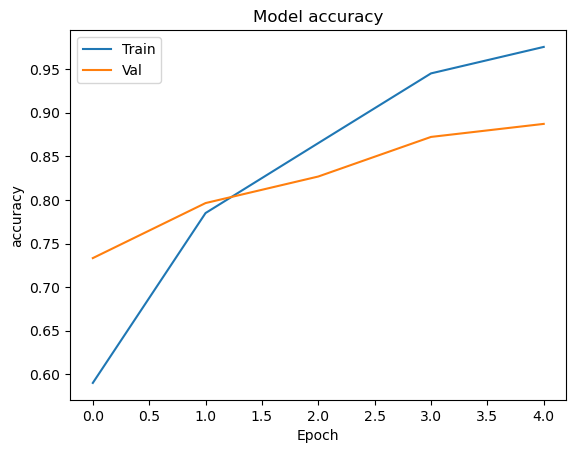

In [22]:
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Дійсно, з графіку видно, що після 5 епохи виникає перенавчання. Callback спрацював коректно.

### <center>Оцінка результативності мереж LSTM та GRU на тестових даних

Проведемо оцінку якості роботи обох навчених мереж на тестовій множині. Для цього спочатку перетворимо тестові дані у формат частотного подання слів.

In [23]:
test_sequences = tokenizer.texts_to_sequences(news_test)

Вирівняємо довжини векторів у тестовому наборі даних.

In [24]:
x_test = pad_sequences(test_sequences, maxlen=max_news_len)

Переглянемо перші 5 записів із тестового набору даних.

In [25]:
x_test[:5]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,   174,   133,     1,     7,    12,   424,   268,
            8,    10,    39,    15,     4,     2,     3],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,   152,     1,    11,     6,
         1098,    39,    15,    29,    14,   215,   141],
       [    0,     0,     0,    

Проведемо оцінку якості роботи мережі LSTM на тестовій множині. Для цього завантажимо ваги найкращої моделі.

In [26]:
model_lstm.load_weights(model_lstm_save_path)

Тестуємо.

In [27]:
model_lstm.evaluate(x_test, y_test, verbose=1)

63/63 [==============================] - 1s 8ms/step - loss: 0.3518 - accuracy: 0.8854


[0.3517659902572632, 0.8854010701179504]

Мережа показала долю правильних відповідей на тестовій множині на рівні  близько 89,6%.

### <center>Перевірка роботи мереж на власних даних

Застосуємо навчені мережі для класифікації довільного тексту. відгук з [rottentomatoes.com](https://www.rottentomatoes.com/m/the_social_dilemma).

In [45]:
my_news = ["With all the digital technology we carry and have around the house, we just don't know who is"]

In [46]:
my_news

["With all the digital technology we carry and have around the house, we just don't know who is"]

Перетворимо текст новини до частотного подання. Зверніть увагу, що має використовуватись той самий токенізатор, що і для навчальних даних.

In [47]:
my_sequence = tokenizer.texts_to_sequences(my_news)

In [48]:
my_sequence

[[41, 37, 5, 279, 114, 26, 4005, 8, 34, 344, 5, 2025, 26, 30, 122, 56, 80, 11]]

Вирівняємо довжину отриманого вектора.

In [49]:
x_my = pad_sequences(my_sequence, maxlen=max_news_len)

Запишемо назви класів.

In [50]:
class_names = ['Neutral', 'Positive', 'Negative']

Використаємо мережу LSTM для класифікації даного тексту.

In [51]:
prediction_lstm = model_lstm.predict(x_my)
score_lstm = np.max(prediction_lstm)
prediction_lstm = np.argmax(prediction_lstm)

In [52]:
print(f'Категорія новини: {class_names[prediction_lstm]} \nДостовірність {score_lstm*100:.2f} %')

Категорія новини: Positive 
Достовірність 95.80 %
